## 단순 선형 예시(독립변수:1,종속변수:1)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 랜덤 데이터 생성
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50,size=len(area))
area, price

(array([29.41013086, 26.00039302, 27.44684496, 30.602233  , 29.66889498,
        22.5568053 , 27.37522104, 24.62160698, 24.74195287, 26.02649625,
        25.36010893, 28.63568377, 26.90259431, 25.30418754, 26.10965808,
        25.83418582, 28.73519768, 24.48710434, 25.78266925, 22.86476065,
        18.61752546, 26.63404649, 27.1610905 , 23.14458745, 30.67438656,
        21.36408581, 25.11439629, 24.53204037, 28.83194804, 28.67339692,
        25.38736856, 25.9454063 , 22.78053563, 20.04800883, 24.13021963,
        25.39087242, 28.0757267 , 28.00594962, 24.03168296, 24.24424312,
        22.37861759, 21.44995516, 20.73432452, 29.87693849, 23.72586955,
        23.90481425, 21.8680116 , 26.94372589, 20.96525538, 24.4681493 ,
        22.7613336 , 25.96725624, 23.72298716, 22.04841954, 24.92954443,
        26.07082968, 25.16629306, 25.75617974, 23.41419477, 24.09314709,
        23.31884888, 24.1011171 , 22.96713429, 20.68429349, 25.44356536,
        23.99554766, 20.92450413, 26.15695564, 22.7

In [4]:
data = np.array([area,price])
data

array([[ 29.41013086,  26.00039302,  27.44684496,  30.602233  ,
         29.66889498,  22.5568053 ,  27.37522104,  24.62160698,
         24.74195287,  26.02649625,  25.36010893,  28.63568377,
         26.90259431,  25.30418754,  26.10965808,  25.83418582,
         28.73519768,  24.48710434,  25.78266925,  22.86476065,
         18.61752546,  26.63404649,  27.1610905 ,  23.14458745,
         30.67438656,  21.36408581,  25.11439629,  24.53204037,
         28.83194804,  28.67339692,  25.38736856,  25.9454063 ,
         22.78053563,  20.04800883,  24.13021963,  25.39087242,
         28.0757267 ,  28.00594962,  24.03168296,  24.24424312,
         22.37861759,  21.44995516,  20.73432452,  29.87693849,
         23.72586955,  23.90481425,  21.8680116 ,  26.94372589,
         20.96525538,  24.4681493 ,  22.7613336 ,  25.96725624,
         23.72298716,  22.04841954,  24.92954443,  26.07082968,
         25.16629306,  25.75617974,  23.41419477,  24.09314709,
         23.31884888,  24.1011171 ,  22.

In [5]:
data = pd.DataFrame(data = data.T, columns=['area','price'])
data

,area,price
0,29.410131,760.253272
1,26.000393,679.009826
2,27.446845,738.171124
3,30.602233,817.055825
4,29.668895,791.722374
...,...,...
95,26.766433,705.160823
96,25.026250,652.656251
97,29.464676,766.616906
98,25.317280,678.932006


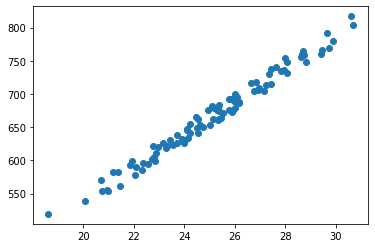

In [7]:
plt.scatter(data['area'], data['price'])
plt.show()

In [13]:
w = sum(price * (area-np.mean(area))) / sum((area-np.mean(area))**2)  # 가중치
b = np.mean(price) - w*np.mean(area)  # 편향 항
w,b

(24.815544052284988, 43.4989785533412)

In [14]:
sum(price * (area-np.mean(area))),sum((area-np.mean(area))**2)

(15755.18138663241, 634.891637009332)

In [16]:
np.mean(price),w*np.mean(area)

(667.5980009709054, 624.0990224175642)

In [17]:
print("The regression coefficients are", w,b)

The regression coefficients are 24.815544052284988 43.4989785533412


In [20]:
y_pred = w*area+b
y_pred,data.price.values

(array([773.32737662, 688.71287694, 724.60736876, 802.91003961,
        779.7487488 , 603.25837416, 722.82998231, 654.49755119,
        657.48399995, 689.36064289, 672.82387882, 754.10905055,
        711.10149285, 671.43615919, 691.42434887, 684.58835479,
        756.5785425 , 651.15979503, 683.30994321, 610.90045375,
        505.50300176, 704.43733248, 717.51621629, 617.84450797,
        804.70056951, 573.6603912 , 666.72638612, 652.27490717,
        758.97945515, 755.04492307, 673.50034153, 687.34835152,
        608.81036404, 541.00122482, 642.30350669, 673.58729169,
        740.21341132, 738.48185512, 639.85826561, 645.1330618 ,
        598.83654912, 575.79128567, 558.03252216, 784.91146175,
        632.26933944, 636.70994954, 586.16558375, 712.1221953 ,
        563.76319703, 650.68941537, 608.33385512, 687.89056981,
        632.19781138, 590.64250492, 662.13918654, 690.46080087,
        668.01423252, 682.65259162, 624.53496021, 641.3835314 ,
        622.1689002 , 641.58131156, 613.

In [21]:
error = data.price.values - y_pred  # 각각의 오차값
error

array([-13.07410499,  -9.70305142,  13.56375525,  14.14578534,
        11.97362559,  -8.33824165,   7.55054379,  -0.9573767 ,
        -6.93517819,  10.30176348,  10.17884437,   1.78304363,
        -4.53663502,   4.16852934,  -5.68289683,   8.26629068,
         1.80139957,  -2.98218652,  -7.74321186,   0.71856254,
        13.93513475,  11.41382973, -12.48895386,   7.77017826,
        -0.84090551,   9.44175414,  15.13352122,  10.0261022 ,
       -10.18075425,   4.79000005,   1.18387258, -10.71319405,
        -4.29697326,  -2.80100408,  -8.04801602, -10.81548112,
         8.67975622,  15.66688543,  -9.0661917 ,   8.97301629,
        -3.37110944, -14.54240675,  -3.67440907,  -4.98799955,
         5.8773992 ,  -4.08959339,   7.53470625,  -2.52904806,
        -9.6318125 ,  15.01431711,  13.69948481,   1.29083631,
        -6.12313247, -12.43201643,  13.09942419,   5.30994104,
        11.14309388,   9.25190199,   6.81990893,   4.94514573,
        -0.19767818,   5.94661584,   6.73744597,  14.31

In [22]:
np.mean(abs(error))  # 평균 오차율

7.875772804465328

### 실제 가격(관측값)과 예측 가격(예측값) 도식화

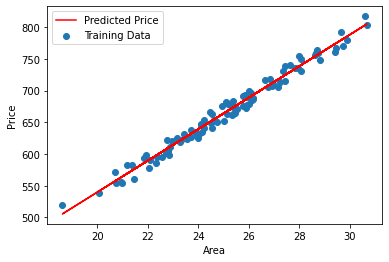

In [23]:
plt.plot(area,y_pred,color='red',label='Predicted Price')
plt.scatter(data['area'],data['price'],label="Training Data")
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

- categorical_column_with_identity : 각 범주는 원핫 인코딩돼 고유한 ID를 갖는다. 이는 숫자값에만 사용 가능
- categorical_column_with_vocabulary_file : 범주형 입력은 문자열, 범주가 파일로 제공될때 사용, 먼저 숫자값으로 변환된 다음 원핫 인코딩
- categorical_column_with_vocabulary_list : 범주가 목록에서 명시적으로 정의된 경우 사용, 먼저 숫자값으로 변환된 다음 원핫 인코딩
- categorical_column_with_hash_bucket : 범주 수가 매우 많아 원핫 인코딩이 불가능할 때 해시를 사용
- crossed_column : 두 개의 열을 병합해 하나의 특징으로 사용하고자 할 때, 예컨데 위도와 경도를 합쳐 하나의 특징으로 사용하는 것이 좋다.
- indicator_column : 범주 수가 제한돼 있고 원핫 인코딩으로 표시될 수 있는 경우에만 사용
- embedding_column : 범주 수가 매우 많고 원핫 인코딩으로 표시될 수 없는 경우에만 사용
- bucketized_column : 특정 수치 값 대신 그 값에 따라 데이터를 서로 다른 범주로 분류할 경우 사용

In [7]:
import tensorflow as tf
import pandas as pd
import tensorflow.feature_column as fc

In [11]:
featcols = [
    tf.feature_column.numeric_column('area'),
    tf.feature_column.categorical_column_with_vocabulary_list("type",['bungalow','apartment'])
]

In [12]:
def train_input_fn():
    features = {'area':[1000,2000,4000,1000,2000,4000],
               'type':['bungalow','bungalow','house','apartment','apartment','apartment']}
    labels = [500,1000,1500,700,1300,1900]
    return features, labels

In [13]:
model = tf.estimator.LinearRegressor(featcols)
model.train(train_input_fn, steps=200)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/fs/qjp88bt91vn_8kbs8qkcc_z00000gn/T/tmpwf0p3xok', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to 

In [14]:
def predict_input_fn():
    features = {'area':[1500,1800],
               'type':['house','apt']}
    return features

predictions = model.predict(predict_input_fn)

print(next(predictions))
print(next(predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/fs/qjp88bt91vn_8kbs8qkcc_z00000gn/T/tmpwf0p3xok/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([692.7829], dtype=float32)}
{'predictions': array([830.9035], dtype=float32)}


## 보스턴 주택 데이터셋 예제

In [1]:
import tensorflow as tf
import pandas as pd
import tensorflow.feature_column as fc
from tensorflow.keras.datasets import boston_housing

%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

In [2]:
tf.__version__

'2.2.0'

In [28]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

In [31]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
features = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE',
            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
 
x_train_df = pd.DataFrame(x_train, columns= features)
x_test_df = pd.DataFrame(x_test, columns= features)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
feature_columns = []
for feature_name in features:
    feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

feature_columns

[NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='CHAS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PTRATIO'

In [6]:
def estimator_input_fn(df_data, df_label, epochs=20, shuffle=True, batch_size=64):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function

train_input_fn = estimator_input_fn(x_train_df, y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test_df, epochs=1, shuffle=False)

In [7]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir = 'logs/')
linear_est.train(train_input_fn, steps=100)
result = linear_est.evaluate(val_input_fn)
print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/func/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.re

In [8]:
result = linear_est.predict(val_input_fn)

In [9]:
for pred,exp in zip(result, y_test[:32]):
    print("Predicted Value: ", pred['predictions'][0], "Expected: ", exp)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/func/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicted Value:  3.6693795 Expected:  7.2
Predicted Value:  23.505642 Expected:  18.8
Predicted Value:  22.02457 Expected:  19.0
Predicted Value:  22.769117 Expected:  27.0
Predicted Value:  22.623856 Expected:  22.2
Predicted Value:  21.803467 Ex

In [12]:
%tensorboard --logdir logs

In [13]:
!kill 31399

/bin/sh: line 0: kill: (31399) - No such process


In [14]:
import tensorflow as tf
import pandas as pd
import tensorflow.feature_column as fc

%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
tf.__version__

'2.2.0'

In [17]:
df = pd.read_csv('../project/modeling_2nd/visualization/processedData.csv', encoding='cp949')
df.head(1)

,시군구,본번,부번,apt,exclusive_area,transaction_ym,transaction_day,transaction_real_price,floor,completion_year,...,academy_cnt,daycare_cnt,kindergarden_cnt,dist_river,dist_subway,dist_park,dist_starbucks,StationIA(mean_price),StarbucksIA(mean_price),ParkIA(mean_price)
0,서울특별시 구로구 신도림동,643,0,동아1,84.908,201611,8,50000,1,1999,...,1281,473,38,3.191675,0.372833,0.548902,0.629231,52499.0,46844.0,44941.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057565 entries, 0 to 1057564
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   시군구                      1057565 non-null  object 
 1   본번                       1057565 non-null  int64  
 2   부번                       1057565 non-null  int64  
 3   apt                      1057565 non-null  object 
 4   exclusive_area           1057565 non-null  float64
 5   transaction_ym           1057565 non-null  int64  
 6   transaction_day          1057565 non-null  int64  
 7   transaction_real_price   1057565 non-null  int64  
 8   floor                    1057565 non-null  int64  
 9   completion_year          1057565 non-null  int64  
 10  addr_kr                  1057565 non-null  object 
 11  apt_lat                  1057565 non-null  float64
 12  apt_lng                  1057565 non-null  float64
 13  city                     1057565 non-null 

In [19]:
df = df.drop(['시군구','본번','부번','apt','transaction_y','transaction_m','transaction_day','addr_kr','city','gu','dong'], axis=1)
df.head(1)

,exclusive_area,transaction_ym,transaction_real_price,floor,completion_year,apt_lat,apt_lng,code,subway_cnt,park_cnt,...,academy_cnt,daycare_cnt,kindergarden_cnt,dist_river,dist_subway,dist_park,dist_starbucks,StationIA(mean_price),StarbucksIA(mean_price),ParkIA(mean_price)
0,84.908,201611,50000,1,1999,37.51096,126.882239,1153010100,11,48.0,...,1281,473,38,3.191675,0.372833,0.548902,0.629231,52499.0,46844.0,44941.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057565 entries, 0 to 1057564
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   exclusive_area           1057565 non-null  float64
 1   transaction_ym           1057565 non-null  int64  
 2   transaction_real_price   1057565 non-null  int64  
 3   floor                    1057565 non-null  int64  
 4   completion_year          1057565 non-null  int64  
 5   apt_lat                  1057565 non-null  float64
 6   apt_lng                  1057565 non-null  float64
 7   code                     1057565 non-null  int64  
 8   subway_cnt               1057565 non-null  int64  
 9   park_cnt                 1057565 non-null  float64
 10  starbucks_cnt            1057565 non-null  int64  
 11  academy_cnt              1057565 non-null  int64  
 12  daycare_cnt              1057565 non-null  int64  
 13  kindergarden_cnt         1057565 non-null 

In [33]:
features = df.columns[(df.columns != 'transaction_real_price')&(df.columns != 'apt_lat')&(df.columns != 'apt_lng')]
features

Index(['exclusive_area', 'transaction_ym', 'floor', 'completion_year', 'code',
       'subway_cnt', 'park_cnt', 'starbucks_cnt', 'academy_cnt', 'daycare_cnt',
       'kindergarden_cnt', 'dist_river', 'dist_subway', 'dist_park',
       'dist_starbucks', 'StationIA(mean_price)', 'StarbucksIA(mean_price)',
       'ParkIA(mean_price)'],
      dtype='object')

In [37]:
location = df.columns[(df.columns == 'apt_lat')|(df.columns == 'apt_lng')]
location

Index(['apt_lat', 'apt_lng'], dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

X = df.drop('transaction_real_price', axis=1)
Y = df.transaction_real_price
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25, random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((793173, 20), (793173,), (264392, 20), (264392,))

In [38]:
feature_columns = []
for name in features:
    feature_columns.append(fc.numeric_column(name, dtype=tf.float32))

feature_columns

[NumericColumn(key='exclusive_area', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='transaction_ym', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='floor', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='completion_year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='code', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='subway_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='park_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='starbucks_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='academy_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='daycare_cnt', shape=(1,), default_value=

In [43]:
feature_columns.append(fc.crossed_column(['apt_lat','apt_lng'],50))

In [44]:
feature_columns

[NumericColumn(key='exclusive_area', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='transaction_ym', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='floor', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='completion_year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='code', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='subway_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='park_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='starbucks_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='academy_cnt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='daycare_cnt', shape=(1,), default_value=

In [48]:
def estimator_input_fn(df_data, df_label, epochs=20, shuffle=True, batch_size=256):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function

train_input_fn = estimator_input_fn(x_train, y_train)
val_input_fn = estimator_input_fn(x_test, y_test, epochs=1, shuffle=False)

In [49]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir = 'logs/func/')
linear_est.train(train_input_fn, steps=100000)
result = linear_est.evaluate(val_input_fn)
print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/func/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in 

In [50]:
result = linear_est.predict(val_input_fn)

In [51]:
for pred,exp in zip(result, y_test[:32]):
    print("Predicted Value: ", pred['predictions'][0], "Expected: ", exp)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/func/model.ckpt-61980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicted Value:  43820.633 Expected:  52000
Predicted Value:  44851.47 Expected:  66000
Predicted Value:  48707.027 Expected:  213000
Predicted Value:  45964.29 Expected:  40000
Predicted Value:  45805.63 Expected:  82000
Predicted Value:  44573

In [58]:
%tensorboard --logdir logs/func

Reusing TensorBoard on port 6006 (pid 37828), started 0:08:09 ago. (Use '!kill 37828' to kill it.)

## 로지스틱 회귀 모델 예제(mnist)

In [1]:
import tensorflow as tf
from tensorflow import keras as k

# 헬퍼 라이브러리
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
# 훈련과 평가 데이터 로드
((train_data,train_labels),(eval_data,eval_labels)) = tf.keras.datasets.mnist.load_data()
train_data.shape,train_labels.shape,eval_data.shape,eval_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)

eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32)

In [4]:
feature_columns = [tf.feature_column.numeric_column('x', shape=[28,28])]
feature_columns

[NumericColumn(key='x', shape=(28, 28), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [13]:
classifier_1 = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    n_classes=10,
    model_dir="mnist_model_1/"
)
classifier_2 = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[128,128],
    n_classes=10,
    model_dir="mnist_model_2/"
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'mnist_model_1/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'mnist_model_2/', '_tf_random_seed':

In [7]:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True
)

In [18]:
classifier_1.train(input_fn=train_input_fn, steps=10)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into mnist_model_1/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 2.3025854, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10...
INFO:tensorflow:Saving checkpoints for 10 into mnist_model_1/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10...
INFO:tensorflow:Loss for final step: 0.9625178.


In [14]:
classifier_2.train(input_fn=train_input_fn, steps=10)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_model_2/model.ckpt-10
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10...
INFO:tensorflow:Saving checkpoints for 10 into mnist_model_2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10...
INFO:tensorflow:loss = 2.2973757, step = 10
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 20...
INFO:tensorflow:Saving checkpoints for 20 into mnist_model_2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 20...
INFO:tensorflow:Loss for final step: 2.3016179.


In [10]:
val_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False
)

In [19]:
eval_results_1 = classifier_1.evaluate(input_fn=val_input_fn)
print(eval_results_1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-15T18:52:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_model_1/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.23968s
INFO:tensorflow:Finished evaluation at 2020-06-15-18:52:05
INFO:tensorflow:Saving dict for global step 10: accuracy = 0.7075, average_loss = 1.0004855, global_step = 10, loss = 0.999222
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10: mnist_model_1/model.ckpt-10
{'accuracy': 0.7075, 'average_loss': 1.0004855, 'loss': 0.999222, 'global_step': 10}


In [15]:
eval_results_2 = classifier_2.evaluate(input_fn=val_input_fn)
print(eval_results_2)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-15T18:48:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_model_2/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.24625s
INFO:tensorflow:Finished evaluation at 2020-06-15-18:48:52
INFO:tensorflow:Saving dict for global step 20: accuracy = 0.0792, average_loss = 2.2974072, global_step = 20, loss = 2.2970278
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20: mnist_model_2/model.ckpt-20
{'accuracy': 0.0792, 'average_loss': 2.2974072, 'loss': 2.2970278, 'global_step': 20}


In [1]:
%tensorboard --logdir mnist_model_1

In [26]:
!kill 40470